In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
bike_df = pd.read_csv('./data/bike.csv')

In [3]:
bike_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


<Axes: >

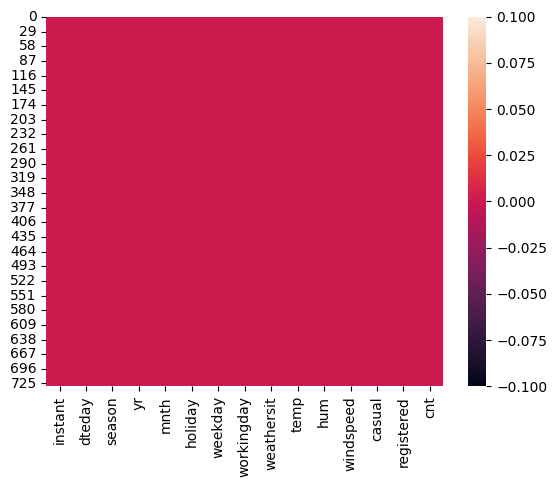

In [5]:
sns.heatmap(bike_df.isnull())

In [6]:
bike = bike_df.drop(labels = ['instant', 'casual', 'registered'], axis = 1)

In [7]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')

In [8]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [9]:
bike.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349


In [10]:
bike = bike.drop(labels = ['dteday'], axis = 1)

In [11]:
bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349


Text(0, 0.5, 'Bike Rental')

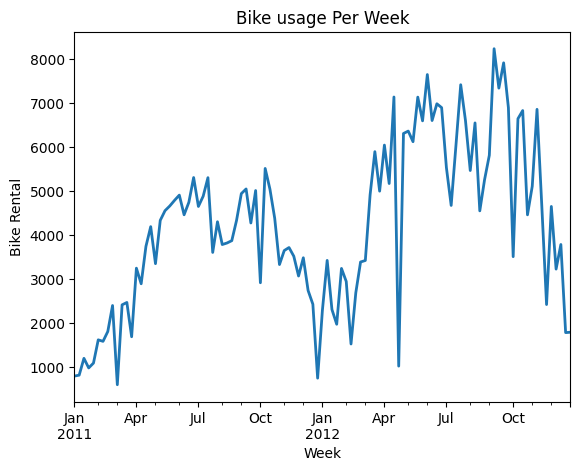

In [12]:
bike['cnt'].asfreq('W').plot(linewidth = 2)
plt.title('Bike usage Per Week')
plt.xlabel('Week')
plt.ylabel('Bike Rental')
          

In [13]:
bike.tail(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2012-12-31,1,1,12,0,1,1,2,0.215833,0.5775,0.154846,2729


In [14]:
X_numerical = bike[['temp',	'hum',	'windspeed'	,'cnt']]

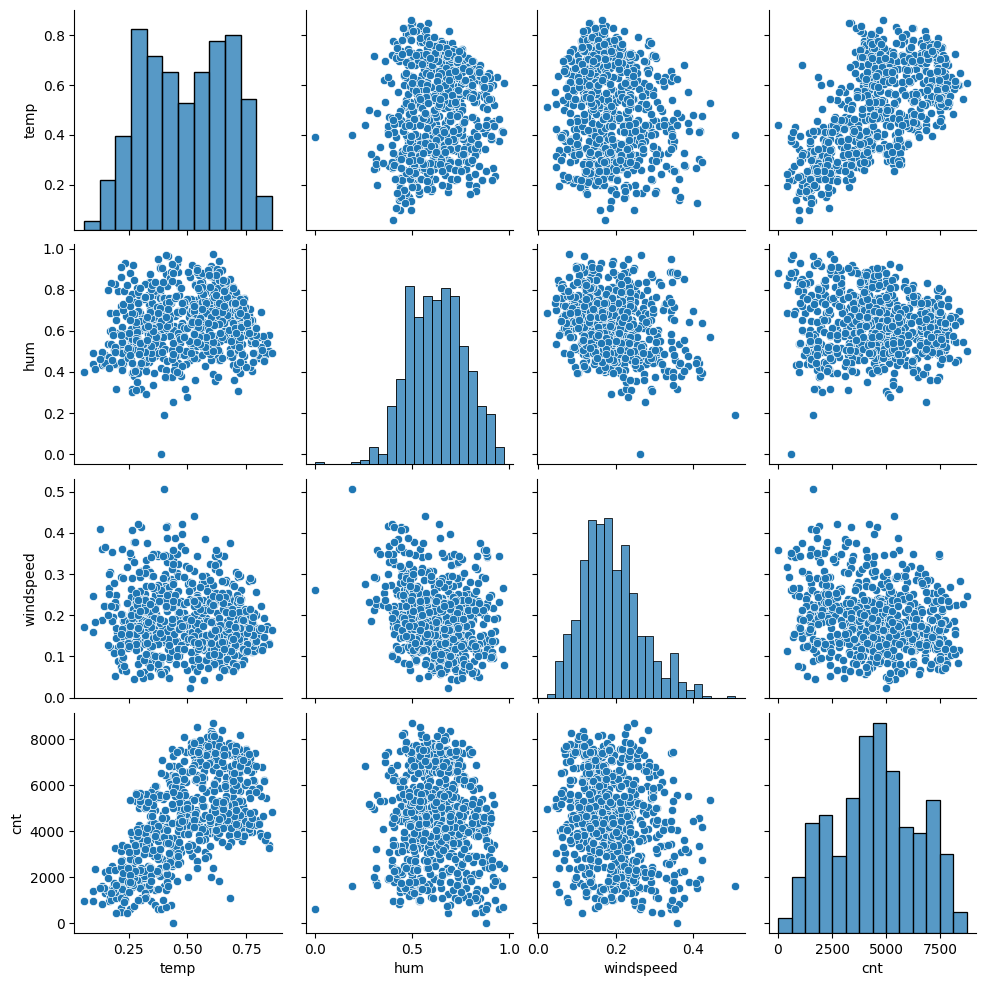

In [15]:
sns.pairplot(X_numerical)

<Axes: >

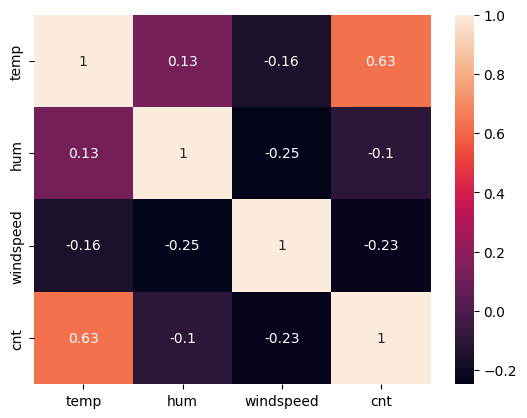

In [16]:
sns.heatmap(X_numerical.corr(), annot=True)

## There is a correlation between TMP and Rental

In [17]:
X_cat=bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [18]:
oneHotEncoder = OneHotEncoder()

In [19]:
X_cat = oneHotEncoder.fit_transform(X_cat).toarray()

In [20]:
X_cat = pd.DataFrame(X_cat)

In [21]:
X_cat.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
X_numerical.head(2)

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801


In [23]:
X_numerical = X_numerical.reset_index()

In [24]:
X_numerical = X_numerical.drop('dteday', axis =1)

In [25]:
X_all = pd.concat([X_cat, X_numerical], axis = 1 )

In [26]:
X_all.head(2)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801


In [27]:
X= X_all.iloc[:, : -1].values
y= X_all.iloc[:, -1]

In [28]:
X.shape, y.shape

((731, 35), (731,))

In [29]:
scaler = MinMaxScaler()
y = y.values.reshape(-1,1)

In [30]:
y = scaler.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [33]:
X_train.shape, y_train.shape

((584, 35), (584, 1))

In [34]:
model = tf.keras.models.Sequential()

In [35]:
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = ( 35,)))

In [36]:
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu' ))

In [37]:
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear' ))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13801 (53.91 KB)
Trainable params: 13801 (53.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(optimizer = 'Adam', loss= 'mean_squared_error')

In [40]:
epochs_hist = model.fit(X_train, y_train, epochs=25, batch_size = 50, validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2947 - val_loss: 0.0712
Epoch 2/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0812 - val_loss: 0.0510
Epoch 3/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0357 - val_loss: 0.0258
Epoch 4/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 0.0145
Epoch 5/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0130
Epoch 6/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0120
Epoch 7/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0103
Epoch 8/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0094
Epoch 9/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0088
Epoch 10/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0085
Epoch 11/25
10/10 [

In [41]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training loss')

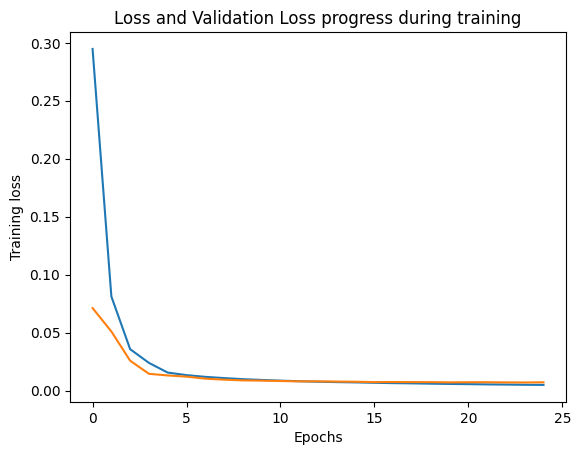

In [42]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Loss and Validation Loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')

In [43]:
y_predict = model.predict(X_test)

5/5 [==============================] - 0s 579us/step


Text(0, 0.5, 'True values')

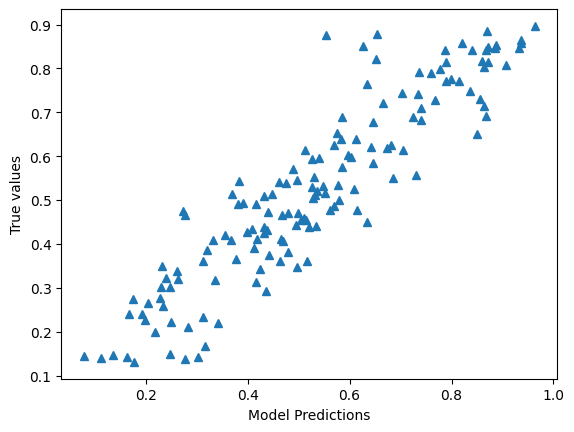

In [44]:
plt.plot(y_test, y_predict, '^')
plt.xlabel('Model Predictions')
plt.ylabel('True values')

In [45]:
y_predict_origin = scaler.inverse_transform(y_predict)
y_test_origin = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True values after ')

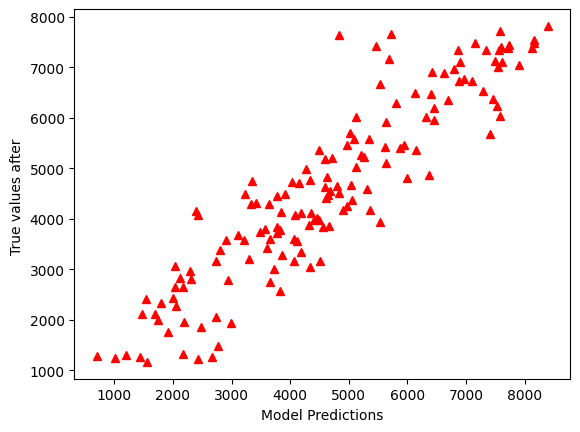

In [46]:
plt.plot(y_test_origin, y_predict_origin, '^', color = 'red')
plt.xlabel('Model Predictions')
plt.ylabel('True values after ')

In [47]:
k = X_test.shape[1]
k

35

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

MSE = Srednia wartosc kwadratow roznic miedzy rzeczywistymi a przewidywanymi wartosciami
RMSE = Pierwiastek kwadratowy z MSE
MAE = Srednia wartosc bezwsglednych roznic miedzy rzeczywistymi a przewidywanymi wartosciami


In [49]:
RMSE = np.sqrt(mean_squared_error(y_test_origin, y_predict_origin))
MSE = mean_squared_error(y_test_origin, y_predict_origin)
MAE = mean_absolute_error(y_test_origin, y_predict_origin)

In [50]:
print ('RMSE = ', RMSE, '\nMSE = ',MSE, '\nMAE = ', MAE )

RMSE =  771.0338390137942 
MSE =  594493.1809043497 
MAE =  609.9185043646365
